<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to `pandas`

_Authors: Dave Yerrington (SF)_

---

`pandas` is the most popular Python package for managing data sets. It's used extensively by data scientists.

### Learning Objectives

- Define the anatomy of DataFrames.
- Explore data with DataFrames.
- Practice plotting with pandas.
- Know what situations **grouping** is useful for
- Explain and use the **`.groupby()`** function in Pandas
- Demonstrate aggregation and plotting methods by groups in Pandas
- Using `pivot_table()` to convert a DataFrame from long to wide format

<a id='introduction'></a>

### What is `pandas`?

---

- A data analysis library — **P**anel **D**ata **S**ystem.
- It was created by Wes McKinney and open sourced by AQR Capital Management, LLC in 2009.
- It's implemented in highly optimized Python/Cython.
- It's the most ubiquitous tool used to start data analysis projects within the Python scientific ecosystem.

### Pandas Use Cases

---

- Cleaning data/munging.
- Exploratory analysis.
- Structuring data for plots or tabular display.
- Joining disparate sources.
- Modeling.
- Filtering, extracting, or transforming. 

![](https://snag.gy/tpiLCH.jpg)

### Common Outputs

---

With `pandas` you can:

- Export to databases.
- Integrate with `matplotlib`.
- Collaborate in common formats (plus a variety of others).
- Integrate with Python built-ins (**and `numpy`!**).

### Importing `pandas`

---

Import `pandas` at the top of your notebook like so:

In [1]:
import pandas as pd

Recall that the **`import pandas as pd`** syntax nicknames the `pandas` module as **`pd`** for convenience.

<a id='loading_csvs'></a>

### Loading a CSV into a DataFrame

---

`pandas` can load many types of files, but one of the most commonly used for storing data is a ```.csv```. As an example, let's load a data set on Apple stock prices (AAPL.csv) from [Yahoo Finance](https://finance.yahoo.com/quote/AAPL):

In [2]:
aapl =pd.read_csv('AAPL.csv')

In [3]:
aapl.head()##see first 5 rows
aapl.head(10)##see the first 10 rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-29,113.160004,113.800003,111.800003,112.180000,110.235504,35887000
1,2016-09-30,112.459999,113.370003,111.800003,113.050003,111.090431,36379100
2,2016-10-03,112.709999,113.050003,112.279999,112.519997,110.569603,21701800
3,2016-10-04,113.059998,114.309998,112.629997,113.000000,111.041290,29736800
4,2016-10-05,113.400002,113.660004,112.690002,113.050003,111.090431,21453100
5,2016-10-06,113.699997,114.339996,113.129997,113.889999,111.915863,28779300
6,2016-10-07,114.309998,114.559998,113.510002,114.059998,112.082916,24358400
7,2016-10-10,115.019997,116.750000,114.720001,116.050003,114.038429,35826200
8,2016-10-11,117.699997,118.690002,116.199997,116.300003,114.284088,64041000
9,2016-10-12,117.349998,117.980003,116.750000,117.339996,115.306061,37586800


In [4]:
aapl.tail()##see the last 5 rows

,Date,Open,High,Low,Close,Adj Close,Volume
248,2017-09-25,149.990005,151.830002,149.160004,150.550003,150.550003,44387300
249,2017-09-26,151.779999,153.919998,151.690002,153.139999,153.139999,36660000
250,2017-09-27,153.800003,154.720001,153.539993,154.229996,154.229996,25504200
251,2017-09-28,153.889999,154.279999,152.699997,153.279999,153.279999,21958200
252,2017-09-29,153.210007,154.130005,152.000000,154.119995,154.119995,22850865


This creates a `pandas` object called a **DataFrame**. DataFrames are powerful containers, featuring many built-in functions for exploring and manipulating data.

We will barely scratch the surface of DataFrame functionality in this lesson, but, throughout this course, you will become an expert at using them.

<a id='exploring_data'></a>

### Exploring Data using DataFrames

---

DataFrames come with built-in functionality that makes data exploration easy. 

To start, let's look at the "header" of your data using the ```.head()``` function. If run alone in a notebook cell, it will show you the first handful of columns in the data set, along with the first five rows.

If we want to see the last part of our data, we can use the ```.tail()``` function equivalently.

<a id='data_dimensions'></a>

### Data Dimensions

---

It's always good to look at the dimensions of your data. The ```.shape``` property will tell you how many rows and columns are contained within your DataFrame.

In [5]:
aapl.shape
##num of rows and columns


(253, 7)

### Columns
---
You can look up the names of your columns using the ```.columns``` property.

[Note: You will see that the columns are displayed with the **'u'string**. In most cases you can safely ignore this, as the column names are typically loaded in ascii and not unicode.]

In [6]:
aapl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Accessing a specific column is easy. You can use bracket syntax just like you would with Python dictionaries, using the column's string name to extract it.

In [7]:
aapl.rename(columns={'Date':'D'})#rename the column names

#it does not overwrite the original data

#aapl.rename(columns={'Date':'D'},inplace=True)
##inplace=true do not return, but overwrite the original file


,D,Open,High,Low,Close,Adj Close,Volume
0,2016-09-29,113.160004,113.800003,111.800003,112.180000,110.235504,35887000
1,2016-09-30,112.459999,113.370003,111.800003,113.050003,111.090431,36379100
2,2016-10-03,112.709999,113.050003,112.279999,112.519997,110.569603,21701800
3,2016-10-04,113.059998,114.309998,112.629997,113.000000,111.041290,29736800
4,2016-10-05,113.400002,113.660004,112.690002,113.050003,111.090431,21453100
5,2016-10-06,113.699997,114.339996,113.129997,113.889999,111.915863,28779300
6,2016-10-07,114.309998,114.559998,113.510002,114.059998,112.082916,24358400
7,2016-10-10,115.019997,116.750000,114.720001,116.050003,114.038429,35826200
8,2016-10-11,117.699997,118.690002,116.199997,116.300003,114.284088,64041000
9,2016-10-12,117.349998,117.980003,116.750000,117.339996,115.306061,37586800


In [8]:
aapl['Date'].head()
##only look at a specific column of the data

0    2016-09-29
1    2016-09-30
2    2016-10-03
3    2016-10-04
4    2016-10-05
Name: Date, dtype: object

In [9]:
aapl[['Open','Close']].head()

,Open,Close
0,113.160004,112.180000
1,112.459999,113.050003
2,112.709999,112.519997
3,113.059998,113.000000
4,113.400002,113.050003


As you can see, we can also use the ```.head()``` function on a single column, which is represented as a `pandas` Series object.

With a list of strings, you can also access a column (as a DataFrame instead of a Series).

<a id='dataframe_series'></a>

### DataFrame vs. Series

---

There is an important difference between using a list of strings versus only using a string with a column's name: When you use a list containing the string, it returns another **DataFrame**. But, when you only use the string, it returns a `pandas` **Series** object.

**Print out the "Open" column, both as a series and a dataframe**

In [10]:
aapl[['Close']].head()

,Close
0,112.180000
1,113.050003
2,112.519997
3,113.000000
4,113.050003


What's the difference between `pandas`' Series and DataFrame objects?

Essentially, a **Series** object contains the data for a single column, and a **DataFrame** object is a matrix-like container for those Series objects that comprise your data.

As long as your column names don't contain any spaces or other specialized characters (underscores are OK), you can access a column as a property of a DataFrame.  

**Get in the habit of referencing your Series columns using `df['my_column']` rather than with object notation (`df.my_column`)**. There are many edge cases in which the object notation does not work, along with nuances as to how `pandas` will behave.

<a id='dtypes'></a>

### Examining Data Types

---

`pandas` comes with a useful property for looking solely at the data types of your DataFrame columns. Use ```.dtypes``` on your DataFrame:

In [11]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-29,113.160004,113.800003,111.800003,112.180000,110.235504,35887000
1,2016-09-30,112.459999,113.370003,111.800003,113.050003,111.090431,36379100
2,2016-10-03,112.709999,113.050003,112.279999,112.519997,110.569603,21701800
3,2016-10-04,113.059998,114.309998,112.629997,113.000000,111.041290,29736800
4,2016-10-05,113.400002,113.660004,112.690002,113.050003,111.090431,21453100


In [12]:
aapl.dtypes
##objects is string 

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<a id='info'></a>

### Examining Your Data With `.info()`

---

When getting acquainted with a new data set, `.info()` should be the first thing you examine.

**Types** are very important. They affect the way data will be represented in our machine learning models, how data can be joined, whether or not math operators can be applied, and instances in which you can encounter unexpected results.

> _Typical problems that arise when working with new data sets include_:
> - Missing values.
> - Unexpected types (string/object instead of int/float).
> - Dirty data (commas, dollar signs, unexpected characters, etc.).
> - Blank values that are actually "non-null" or single white-space characters.

`.info()` is a function available on every **DataFrame** object. It provides information about:

- The name of the column/variable attribute.
- The type of index (RangeIndex is default).
- The count of non-null values by column/attribute.
- The type of data contained in the column/attribute.
- The unqiue counts of **dtypes** (`pandas` data types).
- The memory usage of our data set.

In [13]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
Date         253 non-null object
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


<a id='describe'></a>

### Summarizing Data with `.describe()`

---

The ```.describe()``` function is useful for taking a quick look at your data. It returns some basic descriptive statistics.

For our example, use the ```.describe()``` function on only the "**Close**" column.

In [14]:
aapl.describe()
# num summaries

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,136.778577,137.682214,135.879249,136.866996,135.869367,2.867972e+07
std,17.468241,17.487058,17.239983,17.328987,17.829076,1.192340e+07
min,106.570000,107.680000,104.080002,105.709999,104.410980,1.147590e+07
25%,117.349998,118.019997,116.779999,117.470001,115.591034,2.125080e+07
50%,141.600006,142.380005,140.869995,141.630005,140.496094,2.596600e+07
75%,151.800003,153.839996,150.559998,152.539993,151.889999,3.254140e+07
max,164.800003,164.940002,163.630005,164.050003,164.050003,1.119850e+08


```.describe()``` gives us the following statistics:

- **Count**, which is equivalent to the number of cells (rows).
- **Mean**, or, the average of the values in the column.
- **Std**, which is the standard deviation.
- **Min**, a.k.a., the minimum value.
- **25%**, or, the 25th percentile of the values.
- **50%**, or, the 50th percentile of the values ( which is the equivalent to the median).
- **75%**, or, the 75th percentile of the values.
- **Max**, which is the maximum value.

<img src="https://snag.gy/AH6E8I.jpg">

There are also built-in math functions that will work on all columns of a DataFrame at once, as well as subsets of the data.

For example, I can use the **```.mean()```** function on the ```Apple``` DataFrame to get the mean for every column.

In [15]:
aapl.mean()

Open         1.367786e+02
High         1.376822e+02
Low          1.358792e+02
Close        1.368670e+02
Adj Close    1.358694e+02
Volume       2.867972e+07
dtype: float64

In [16]:
aapl.mean()['Open']

136.7785772450593

<a id='indexing'></a>

### `pandas` Indexing 

---

More often than not, we want to operate on or extract specific portions of our data. When we perform indexing on a DataFrame or Series, we can specify a certain section of the data.

`pandas` has three properties you can use for indexing:

- **`.loc`** indexes with the _labels_ for rows and columns.
- **`.iloc`** indexes with the _integer positions_ for rows and columns.
- **`.ix`** indexes with _both labels and integer positions_.

In [17]:
##iloc looking at 0 base index of rows and columns
aapl.iloc[:4,-1]

0    35887000
1    36379100
2    21701800
3    29736800
Name: Volume, dtype: int64

In [18]:
aapl.loc[:4,['Open','Close']]##use column names, not index
##labels the column names


#series #aapl.loc[:4,'Open']
#dataframe #aapl.loc[:4,['Open']]

,Open,Close
0,113.160004,112.180000
1,112.459999,113.050003
2,112.709999,112.519997
3,113.059998,113.000000
4,113.400002,113.050003


<a id='filtering'></a>

### Filtering Logic

---

One of the most powerful features of DataFrames is the ability to use logical commands to filter data.

Subset the ```Apple``` data for only the rows in which `Close` price is greater than $130.

In [19]:
over_130=aapl['Close']>130
#assign the >130 to variable over_130

In [20]:
aapl.loc[over_130,:]#the over 130 close prices starts from 88

,Date,Open,High,Low,Close,Adj Close,Volume
88,2017-02-06,129.130005,130.500000,128.899994,130.289993,128.688934,26845900
89,2017-02-07,130.539993,132.089996,130.449997,131.529999,129.913696,38183800
90,2017-02-08,131.350006,132.220001,131.220001,132.039993,130.417435,23004100
91,2017-02-09,131.649994,132.449997,131.119995,132.419998,131.359818,27991000
92,2017-02-10,132.460007,132.940002,132.050003,132.119995,131.062225,20065500
93,2017-02-13,133.080002,133.820007,132.750000,133.289993,132.222839,23035400
94,2017-02-14,133.470001,135.089996,133.250000,135.020004,133.939011,32815500
95,2017-02-15,135.520004,136.270004,134.619995,135.509995,134.425079,35623100
96,2017-02-16,135.669998,135.899994,134.839996,135.350006,134.266357,22584600
97,2017-02-17,135.100006,135.830002,135.100006,135.720001,134.633408,22198200


In [21]:
aapl.loc[over_130,:].shape

(165, 7)

In [22]:
volumn_40=aapl['Volume']>40000000

In [23]:
aapl.loc[volumn_40,:]

,Date,Open,High,Low,Close,Adj Close,Volume
8,2016-10-11,117.699997,118.690002,116.199997,116.300003,114.284088,64041000
18,2016-10-25,117.949997,118.360001,117.309998,118.250000,116.200294,48129000
19,2016-10-26,114.309998,115.699997,113.309998,115.589996,113.586395,66134200
23,2016-11-01,113.459999,113.769997,110.529999,111.489998,109.557465,43825800
29,2016-11-09,109.879997,111.320000,108.050003,110.879997,109.517456,59176400
30,2016-11-10,111.089996,111.089996,105.830002,107.790001,106.465424,57134500
32,2016-11-14,107.709999,107.809998,104.080002,105.709999,104.410980,50872500
34,2016-11-16,106.699997,110.230003,106.599998,109.989998,108.638382,58702500
52,2016-12-13,113.839996,115.919998,113.750000,115.190002,113.774490,43733800
54,2016-12-15,115.379997,116.730003,115.230003,115.820000,114.396751,46524500


In [24]:
aapl.loc[volumn_40,:].shape

(29, 7)

The ampersand sign can be used to subset where multiple conditions need to be met for each row. 

Subset the data for `Close` greater than $130 like before, but now, also include where the `Volume` is greater than 35,000,000 shares.

In [25]:
aapl.loc[(aapl['Open']>110)&(aapl['Volume']>25000000),:]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-29,113.160004,113.800003,111.800003,112.180000,110.235504,35887000
1,2016-09-30,112.459999,113.370003,111.800003,113.050003,111.090431,36379100
3,2016-10-04,113.059998,114.309998,112.629997,113.000000,111.041290,29736800
5,2016-10-06,113.699997,114.339996,113.129997,113.889999,111.915863,28779300
7,2016-10-10,115.019997,116.750000,114.720001,116.050003,114.038429,35826200
8,2016-10-11,117.699997,118.690002,116.199997,116.300003,114.284088,64041000
9,2016-10-12,117.349998,117.980003,116.750000,117.339996,115.306061,37586800
10,2016-10-13,116.790001,117.440002,115.720001,116.980003,114.952301,35192400
11,2016-10-14,117.879997,118.169998,117.129997,117.629997,115.591034,35652200
18,2016-10-25,117.949997,118.360001,117.309998,118.250000,116.200294,48129000


In [26]:
aapl.loc[(aapl['Close']>230)&(aapl['Volume']>35000000),:].describe()

,Open,High,Low,Close,Adj Close,Volume
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
##2 conditions 'or'
aapl.loc[(aapl['Open']<110)|(aapl['Volume']>45000000),:].head()

,Date,Open,High,Low,Close,Adj Close,Volume
8,2016-10-11,117.699997,118.690002,116.199997,116.300003,114.284088,64041000
18,2016-10-25,117.949997,118.360001,117.309998,118.250000,116.200294,48129000
19,2016-10-26,114.309998,115.699997,113.309998,115.589996,113.586395,66134200
26,2016-11-04,108.529999,110.250000,108.110001,108.839996,107.502518,30837000
29,2016-11-09,109.879997,111.320000,108.050003,110.879997,109.517456,59176400


In [28]:
aapl.loc[(aapl['Low']<170)|(aapl['High']>155),:].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-29,113.160004,113.800003,111.800003,112.180000,110.235504,35887000
1,2016-09-30,112.459999,113.370003,111.800003,113.050003,111.090431,36379100
2,2016-10-03,112.709999,113.050003,112.279999,112.519997,110.569603,21701800
3,2016-10-04,113.059998,114.309998,112.629997,113.000000,111.041290,29736800
4,2016-10-05,113.400002,113.660004,112.690002,113.050003,111.090431,21453100


<a id='basic_plotting'></a>

### Basic Plotting Using DataFrames

---

DataFrames also come with some basic convenience functions for plotting data. First, import `matplotlib` and set it to run "inline" in your notebook.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
##do not need .show()

Using our ```Apple``` DataFrame once again, use the ```.plot()``` function to plot the **`Close`** price against the **`Date`** column.

Before we do that, we'll need to convert the date column to an actual date (currently, it's a string).

In [30]:
aapl.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [31]:
#set date to date format 
aapl['Date']=pd.to_datetime(aapl['Date'])

In [32]:
aapl.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

The ```.hist()``` function will create a histogram for a column's values.

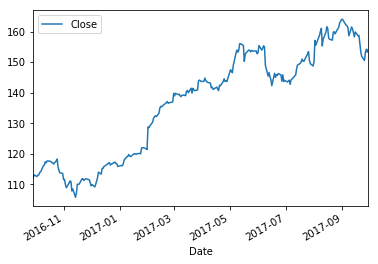

In [87]:
aapl.plot('Date','Close')##linechart

We can also create scatter plots, which show how the change in one column relates to the change in another column.

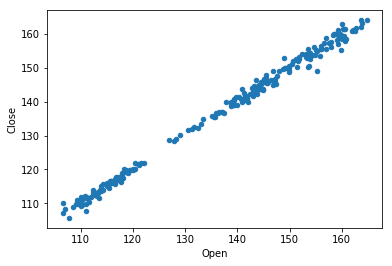

In [33]:
##hist to see dist
aapl.plot('Open','Close',kind='scatter')

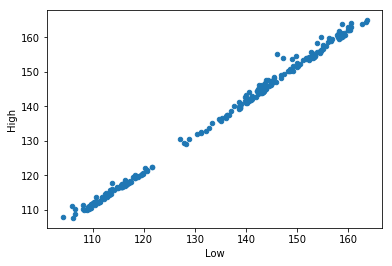

In [35]:
aapl.plot('Low','High',kind='scatter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112ebad68>]], dtype=object)

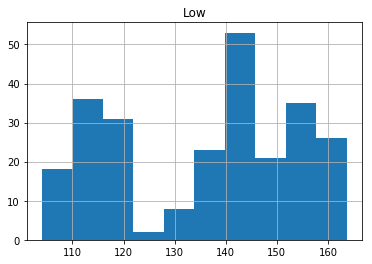

In [36]:
aapl.hist('Low')

<a id='overview'></a>

### Overview of multi-dimensional data analysis

---

- Describe segments of your data based on unique values
- Understand characteristics of your data
   - Summary statistics across subsets
   - Discover patterns that exist in some subsets but not others
- Finding duplicate values or redundant data
- Apply aggregate functions to subsets

<a id='grouping_examples'></a>

### Analyzing data by group: some specific examples

---

 - Sum of crimes by time of day in SF (morning, afternoon, night)
 - Count number of people with the same last name
 - Median number of multi-unit buildings in a region
 - Popularity of movie genres by region
 - Segmenting customers based on age, buying habbits, interests, behavior
 - Using the "GROUP BY" clause in a database query using SQL

<a id='load_titanic'></a>

### Exploring the Movielens dataset with grouping

---

To explore the power of grouping with pandas we will be using movie ratings dataset (**movies.csv**) from the [MovieLense Database](https://grouplens.org/datasets/movielens/)

In [42]:
mvs =pd.read_csv('movies.csv')
mvs.head()


,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [41]:
mvs.shape

(100004, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11337f1d0>]], dtype=object)

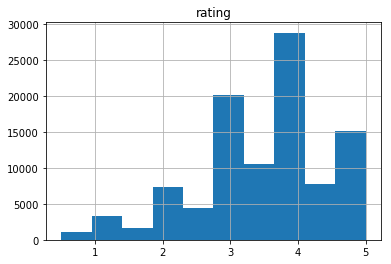

In [43]:
mvs.hist('rating')

In [45]:
mvs['title'].unique()

array(['Dangerous Minds (1995)', 'Dumbo (1941)', 'Sleepers (1996)', ...,
       'Pie in the Sky (1996)', 'Summer Catch (2001)',
       '6th Man, The (Sixth Man, The) (1997)'], dtype=object)

In [52]:
len(mvs['userId'].unique())

671

<a id='groupby'></a>

### Intro to `.groupby()` in pandas

---

The built-in `.groupby()` functions for dataframes is one of the most useful tools in pandas. As the name implies, `.groupby` will group your dataset by one or more user-specified column names.

**Using `.groupby`, create a grouped dataframe where the movie dataset is grouped by "title".**

In [113]:
group = mvs.groupby('title')
group
#dataframe groupy object

**Print out the type of the grouped dataframe.**

In [55]:
print(type(group))

<class 'pandas.core.groupby.DataFrameGroupBy'>


In [138]:
top_ten=group.count()['rating'].sort_values(ascending=False).index[:10]

In [139]:
top_ten

Index(['Forrest Gump (1994)', 'Pulp Fiction (1994)',
       'Shawshank Redemption, The (1994)', 'Silence of the Lambs, The (1991)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Jurassic Park (1993)',
       'Matrix, The (1999)', 'Toy Story (1995)', 'Schindler's List (1993)',
       'Terminator 2: Judgment Day (1991)'],
      dtype='object', name='title')

In [69]:
group.mean().loc[top_ten,'rating']

title
Forrest Gump (1994)                          4.054252
Pulp Fiction (1994)                          4.256173
Shawshank Redemption, The (1994)             4.487138
Silence of the Lambs, The (1991)             4.138158
Star Wars: Episode IV - A New Hope (1977)    4.221649
Jurassic Park (1993)                         3.706204
Matrix, The (1999)                           4.183398
Toy Story (1995)                             3.872470
Schindler's List (1993)                      4.303279
Terminator 2: Judgment Day (1991)            4.006329
Name: rating, dtype: float64

Instead of a `DataFrame` object we now have a `DataFrameGroupBy` object. This operates somewhat differently than the DataFrame we are used to, as we shall see.

In [60]:
group.mean()['rating'].sort_values(ascending=False)

title
Burn Up! (1991)                                                          5.0
Absolute Giganten (1999)                                                 5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)                         5.0
Erik the Viking (1989)                                                   5.0
Reality (2014)                                                           5.0
Ice Princess (2005)                                                      5.0
Ice Age: The Great Egg-Scapade (2016)                                    5.0
Au Hasard Balthazar (1966)                                               5.0
Life of Emile Zola, The (1937)                                           5.0
I'm the One That I Want (2000)                                           5.0
Unvanquished, The (Aparajito) (1957)                                     5.0
Like Father, Like Son (Soshite chichi ni naru) (2013)                    5.0
I'm No Angel (1933)                                                   

<a id='basic_functions'></a>

### Applying basic functions to groups

---

Pandas makes it easy to apply basic statistical functions to the grouped data with built-in functions. For example, if you have a grouped dataframe `grouped`:

```python
print group.mean()
print group.median()
print group.count()
print group.max()
```

We can get the mean, median, count, and max of the columns by group. 

**Try out these built in functions on the grouped data you made above.**

<a id='filtering'></a>

### Filtering Logic with Pandas String Methods

---

Pandas allows you to filter your dataframe based on string matching. The most common way is via the `.str.contains()` method, which accepts a regular expression as a parameter.

Subset the ```movies``` data for only the ratings for Top Gun.

In [77]:
three=mvs.loc[mvs['title'].str.contains('Three Amigos'),:]
three

,userId,movieId,rating,timestamp,title,genres
51400,15,2478,4.0,1122576699,¡Three Amigos! (1986),Comedy|Western
51401,105,2478,3.5,1086094900,¡Three Amigos! (1986),Comedy|Western
51402,111,2478,4.0,1097431568,¡Three Amigos! (1986),Comedy|Western
51403,119,2478,3.0,915412223,¡Three Amigos! (1986),Comedy|Western
51404,146,2478,3.5,1256070833,¡Three Amigos! (1986),Comedy|Western
51405,228,2478,5.0,1449333053,¡Three Amigos! (1986),Comedy|Western
51406,232,2478,4.0,955086643,¡Three Amigos! (1986),Comedy|Western
51407,247,2478,4.0,953271548,¡Three Amigos! (1986),Comedy|Western
51408,285,2478,4.0,965092305,¡Three Amigos! (1986),Comedy|Western
51409,294,2478,3.0,1047072826,¡Three Amigos! (1986),Comedy|Western


In [84]:
mvs.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [90]:
comedy=mvs['genres'].str.contains('Comedy')
mvs.loc[comedy,'rating'].mean()

3.4460369221059275

In [99]:
##ratings of all nonaction movies

non_act=~mvs['genres'].str.contains('Action')
mvs.loc[non_act,'rating'].mean()

3.5799542139606295

In [101]:
con_air=mvs['title'].str.contains('Con Air')
mvs.loc[con_air,'rating'].mean()

3.26271186440678

In [131]:
roman=mvs['genres'].str.contains('Romance')

roman_movies=mvs.loc[roman,:]
roman_review=roman_movies.groupby('title').count()
titles=roman_review['rating'].sort_values(ascending=False).index[:10]
roman_movies.groupby('title').mean().loc[titles,'rating']


title
Forrest Gump (1994)            4.054252
American Beauty (1999)         4.236364
True Lies (1994)               3.515152
Speed (1994)                   3.566667
Beauty and the Beast (1991)    3.750000
Shrek (2001)                   3.847701
Groundhog Day (1993)           3.839394
Titanic (1997)                 3.332317
Princess Bride, The (1987)     4.208589
Good Will Hunting (1997)       4.140127
Name: rating, dtype: float64

In [129]:
mvs['genres'].unique()

array(['Drama', 'Animation|Children|Drama|Musical', 'Thriller',
       'Action|Adventure|Sci-Fi|Thriller', 'Drama|War',
       'Action|Adventure|Drama', 'Fantasy|Horror|Romance|Thriller',
       'Adventure|Sci-Fi', 'Adventure|Animation|Comedy|Crime',
       'Action|Crime|Thriller', 'Action|Adventure|Sci-Fi',
       'Adventure|Comedy', 'Action|Adventure|Fantasy',
       'Adventure|Animation|Children|Comedy|Fantasy',
       'Drama|Horror|Sci-Fi|Thriller', 'Adventure|Comedy|Fantasy|Sci-Fi',
       'Comedy|Western', 'Action|Adventure|Thriller', 'Drama|Romance',
       'Comedy|Romance', 'Mystery|Thriller', 'Crime|Mystery|Thriller',
       'Comedy|Drama|Romance', 'Action|Drama|War', 'Comedy',
       'Adventure|Drama|IMAX', 'Action|Adventure|Comedy|Crime',
       'Drama|Thriller|War', 'Action|Drama|Romance', 'Drama|Thriller',
       'Comedy|Drama', 'Drama|Horror', 'Drama|Fantasy|Romance',
       'Drama|Romance|War|Western', 'Drama|Horror|Sci-Fi',
       'Action|Drama|Sci-Fi|Thriller', 'Comedy

<a id='pivot_tables'></a>

### `Pandas`' `.pivot_table()` Function: Long to Wide Format

---

The `.pivot_table()` function is a powerful tool for both transforming data from long to wide format as well as summarizing data with user-supplied functions.

First, we'll look at transforming the long format data back into the wide format using the `.pivot_table()` function.

**Important parameters for the `.pivot_table()` function include:**
    
- **`columns`**: This is the list of columns in the long format data to be transformed back into columns in the wide format. After pivoting, each unique value in the long format column becomes a header in the wide format.
- **`values`**: A single column indicating the values to use when pivoting and filling the new wide format columns.
- **`index`**: Columns in the long format data that are index variables. These will be left as single columns, not spread out by unique value like in the `columns` parameter.
- **`aggfunc`**: Often `.pivot_table()` is used to perform a summary of the data. `aggfunc` stands for "aggregation function." It's required and defaults to `np.mean()`. You can also insert your own function, which we'll demonstrate below.
- **`fill_value`**: If a cell is missing for the wide format data, this value will fill it in.

In [136]:
pivot=mvs.pivot_table(index='userId', columns='title', values='rating')

In [137]:
pivot.mean()

title
"Great Performances" Cats (1998)                                          1.750000
$9.99 (2008)                                                              3.833333
'Hellboy': The Seeds of Creation (2004)                                   2.000000
'Neath the Arizona Skies (1934)                                           0.500000
'Round Midnight (1986)                                                    2.250000
'Salem's Lot (2004)                                                       3.500000
'Til There Was You (1997)                                                 2.625000
'burbs, The (1989)                                                        3.052632
'night Mother (1986)                                                      5.000000
(500) Days of Summer (2009)                                               3.755556
*batteries not included (1987)                                            3.142857
...And God Spoke (1993)                                                   1.00000

In [135]:
pivot.fillna(0)
##fill NAs with 0

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
